# Introduction to Computer Vision

In this session, we will discuss:

- More on writing functions and error handling
- Image representation in HSV (Hue, Saturation and Value)
- Color Detection in images

In [1]:
# import packages needed
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Error Handling

So far, we have been writing functions that are confined to certain use cases.   However, you do not know how other applications or users will use your code. It is always a good practice to put in some error handling so your code does not fail unexpectedly.

Let's write a simple function that divides two numbers.

In [2]:
def a_divide_b(a, b):
    return a/b

In [3]:
a_divide_b(100, 5)

20.0

In [4]:
a_divide_b(5, 99)

0.050505050505050504

In [5]:
#a_divide_b('hello', 'world')

In [6]:
#a_divide_b(30, 0)

We have several issues:
1. Input values may not be numbers
2. We might accidentally allow a division by zero

In [7]:
# Let's use the isinstance( ) function to test various data types

my_int = 99
print(my_int, "is an integer is", isinstance(my_int, int))
print(my_int, "is a float is   ", isinstance(my_int, float), "\n")

my_float = 1.23
print(my_float, "is an integer is", isinstance(my_float, int))
print(my_float, "is a float is   ", isinstance(my_float, float), "\n")

my_string = "hello world"
print(my_string, "is an integer is", isinstance(my_string, int))
print(my_string, "is a float is   ", isinstance(my_string, float), "\n")

my_list = [1, 2, 3, 4]
print(my_list, "is an integer is", isinstance(my_list, int))
print(my_list, "is a float is   ", isinstance(my_list, float), "\n")

my_2d_array = np.arange(10).reshape(2,5)
print(my_2d_array, "is an integer is", isinstance(my_2d_array, int))
print(my_2d_array, "is a float is   ", isinstance(my_2d_array, float), "\n")

99 is an integer is True
99 is a float is    False 

1.23 is an integer is False
1.23 is a float is    True 

hello world is an integer is False
hello world is a float is    False 

[1, 2, 3, 4] is an integer is False
[1, 2, 3, 4] is a float is    False 

[[0 1 2 3 4]
 [5 6 7 8 9]] is an integer is False
[[0 1 2 3 4]
 [5 6 7 8 9]] is a float is    False 



In [8]:
# In Python, you can delete variables you no longer need to free up memory
del(my_int, my_float, my_string, my_list, my_2d_array)

In [9]:
def a_divide_b_v2(a, b):
    
    if (isinstance(a, int) or isinstance(a, float)) and ((isinstance(b, int) or isinstance(b, float))):
        return a/b
    else: 
        return "Sorry, I cannot divide non-numerical data types"

In [10]:
a_divide_b_v2(3.14159, 10)

0.31415899999999997

In [11]:
a_divide_b_v2("hello world", 10)

'Sorry, I cannot divide non-numerical data types'

In [12]:
my_list = [1, 3, 5]
a_divide_b_v2(my_list, 10)

'Sorry, I cannot divide non-numerical data types'

In [13]:
a_divide_b_v2(2020, 0.0000000000001)

2.02e+16

In [14]:
#a_divide_b_v2(2020, 0)

In [15]:
def a_divide_b_v3(a, b):
    
    if (isinstance(a, int) or isinstance(a, float)) and ((isinstance(b, int) or isinstance(b, float)) and (b != 0)):
        return a/b
    elif (b == 0):
        return "Sorry, I cannot divide by zero"
    else:
        return "Sorry, I cannot divide non-numeric data types"

In [16]:
a_divide_b_v3(2020,  0.0000000000001)

2.02e+16

In [17]:
a_divide_b_v3(2020,  0)

'Sorry, I cannot divide by zero'

### Try/Except Clause

Sometimes it is hard to imagine all the errors a user might make even if you have taken into consideration corner cases. It is good idea to wrap your code in a Try/Except clause whenever possible so errors can be trapped, processed accordingly and not failed at run-time.

- For a general introduction, read: https://www.w3schools.com/python/python_try_except.asp
- For more specific python error codes, read: https://www.tutorialspoint.com/How-to-catch-IOError-Exception-in-Python

In [18]:
def a_divide_b_v4(a, b):
    try:
        if (isinstance(a, int) or isinstance(a, float)) and ((isinstance(b, int) or isinstance(b, float))):
            return a/b
        else:
            return "Sorry, I cannot divide non-numerical data types"

    except:
      print("All remaining errors go here")

In [19]:
a_divide_b_v4(10, 0)

All remaining errors go here


## Color Representation

The RGB (Red, Green, Blue) representation is just one way of representing colors in an image.  Suppose you want to find the yellow ball in an image.  What is the optimal color combination of RGB should we use?  We can fiddle around with numerous combinations of RGB but this is cumbersome.  In computer vision, there are different ways to represent colors.  Let's look at the HSV (Hue, Saturation and Value) method of representing an image.

In [20]:
rgb_img = mpimg.imread('RGB_cube.jpg')
hsv_img = mpimg.imread('HSV_cylinder.jpg')

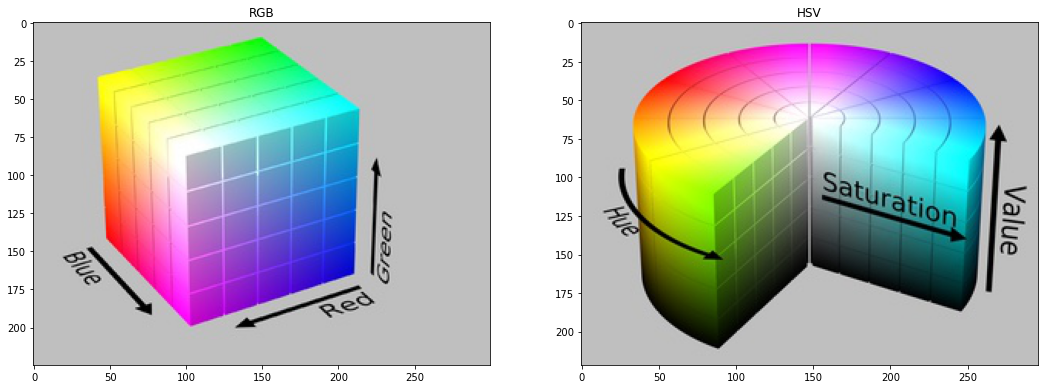

In [21]:
plt.figure(figsize=(18,10))
plt.subplot(1, 2, 1)
plt.title("RGB")
plt.imshow(rgb_img)

plt.subplot(1, 2, 2)
plt.title("HSV")
plt.imshow(hsv_img)
plt.show()

If we wanted to find the color yellow, in the HSV map, there is only a short range of hues that represent yellow.  If you did not care about how bright (i.e. value) or how saturated (i.e. how dense the color is), we don't need to worry about the other two attributes (Saturation and Value).

See color tracking example: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html

Note: Remember that if you are using OpenCV that your images are stored in BGR order rather than RGB!
https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

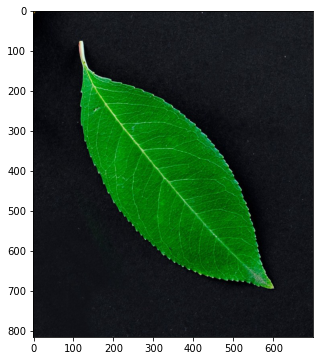

In [22]:
# Let's use green leave picture to illustrate the conversion from RGB to HSV
# Source Article: https://towardsdatascience.com/object-detection-via-color-based-image-segmentation-using-python-e9b7c72f0e11

plt.figure(figsize=(6,6))
green_leaf_img = mpimg.imread('green_leaf.jpg')
plt.imshow(green_leaf_img)
plt.show()

This is a 1x1 pixel image with 3 colors of size: (1, 1, 3) 

The HSV representation: [[[ 60 255 255]]]


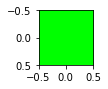

In [23]:
## Getting green HSV color representation
## In RGB representation, the green is in the 2nd position of the list

# create a color picture of 1x1 size (i.e. 1 pixel)
green = np.uint8([[[0, 255, 0]]])
print("This is a 1x1 pixel image with 3 colors of size:", green.shape, "\n")

green_hsv = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print("The HSV representation:", green_hsv)

plt.figure(figsize=(1, 1))
plt.imshow(green)
plt.show()

### RGB (or GBR) to HSV

We know that the green color is [60, 255, 255]. All the greens in the world lie within [45, 100, 50] to [75, 255, 255] that is [60–15, 100, 50] to [60+15, 255, 255]. 15 is just an approximation value. We take this range and convert it to [75, 255, 200] or any other light color (3rd value must be relatively large) cause that’s the brightness of the color, that’s the value that will make this part be white when we threshold the image.

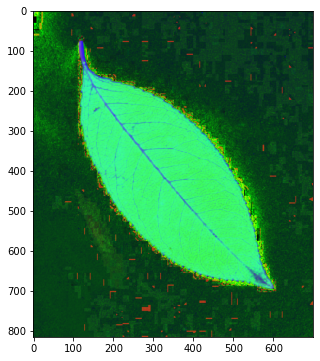

In [24]:
hsv_img = cv2.cvtColor(green_leaf_img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(6,6))
plt.imshow(hsv_img)
plt.show()

In [25]:
# Set the lower & upper threshold for green
lower_green = np.array([45 ,100, 50])
upper_green = np.array([75, 255, 255])

# Threshold the HSV image to get only green colors
curr_mask = cv2.inRange(hsv_img, lower_green, upper_green)

# Let's take a look at the 400th row after thresholding for green
# Notice that when it is green, the integer is 255 and 0 otherwise
# This will come in hand later when trying to find the contour
curr_mask[400:401, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255

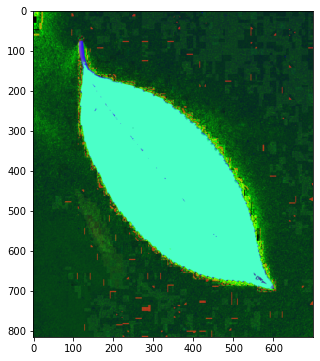

In [26]:
# If we detect any range of acceptable green then set it to this green color [75, 255, 200]
# We do this to make the detected green color(s) a uniform green

# Annie

threshold_green = hsv_img.copy()
threshold_green[curr_mask > 0] = ([75,255,200])

plt.figure(figsize=(6,6))
plt.imshow(threshold_green)
plt.show()

In [27]:
x = ([75,255,200])
type(x)

list

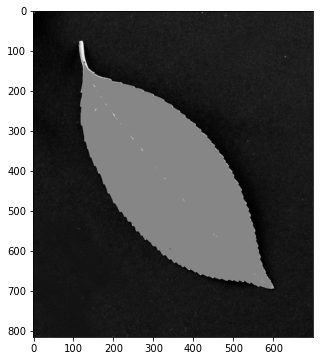

In [28]:
## converting the HSV image to Gray in order to be able to apply contouring

BGR_again = cv2.cvtColor(threshold_green, cv2.COLOR_HSV2BGR)
gray_leaf = cv2.cvtColor(BGR_again, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(gray_leaf, cmap='gray')
plt.show()

### Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be white), else it is assigned another value (may be black). The function used is cv2.threshold( ).

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_thresholding/py_thresholding.html

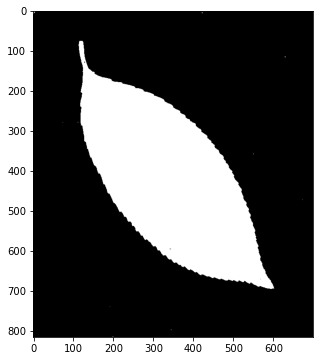

In [29]:
retval, threshold_leaf = cv2.threshold(gray_leaf, 90, 255, 0)

plt.figure(figsize=(6,6))
plt.imshow(threshold_leaf, cmap='gray')
plt.show()

### Finding Contours

OpenCV provides very useful functions to find and draw contours of an image.  There are three arguments in cv2.findContours(image, contour_retrieval_mode, contour_approximation_method) function:

1. First argument is source image
2. Second is contour retrieval mode
3. Third is contour approximation method

It outputs the image, contours and hierarchy. "contours" is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

See: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html

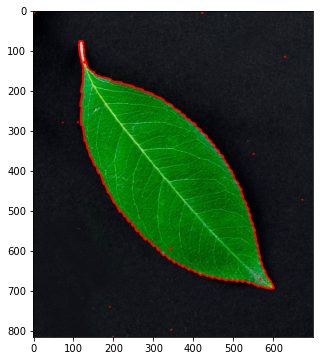

In [30]:
contours, hierarchy =  cv2.findContours(threshold_leaf, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

green_leaf_copy = green_leaf_img.copy()
green_leaf_contour = cv2.drawContours(green_leaf_copy, contours, -1, (255, 0, 0), 3)

plt.figure(figsize=(6,6))
plt.imshow(green_leaf_contour)
plt.show()

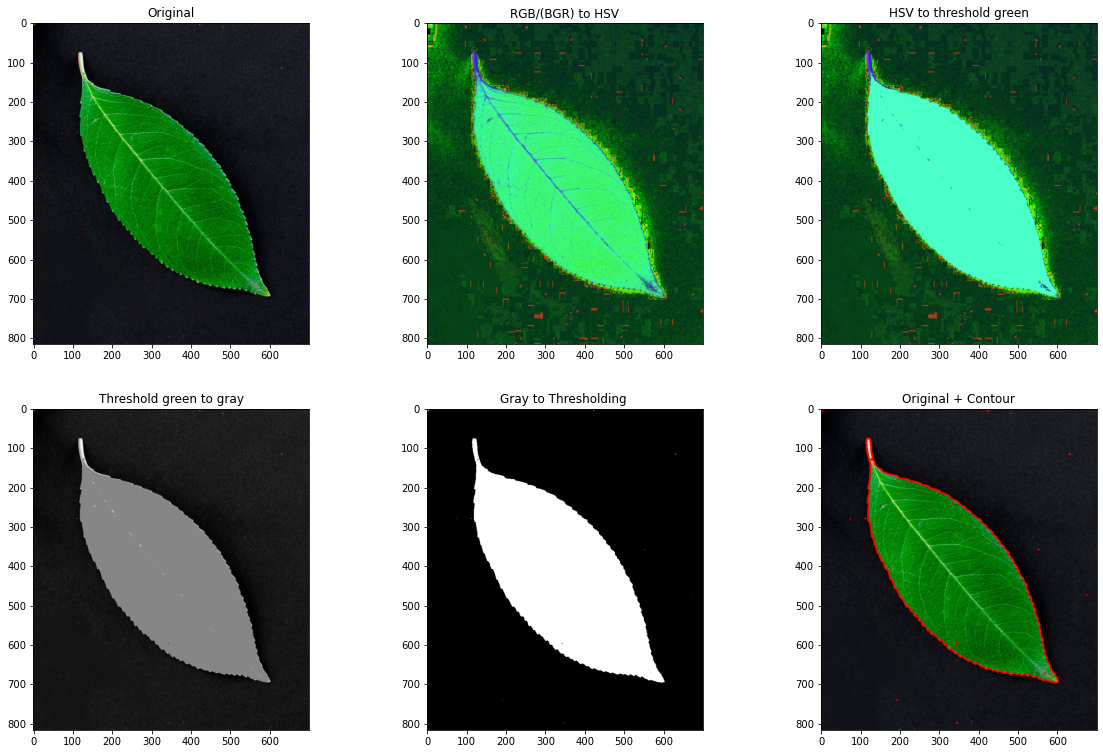

In [31]:
plt.figure(figsize=(20, 13))
plt.tight_layout()

plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(green_leaf_img)

plt.subplot(2, 3, 2)
plt.title("RGB/(BGR) to HSV")
plt.imshow(hsv_img)

plt.subplot(2, 3, 3)
plt.title("HSV to threshold green")
plt.imshow(threshold_green)

plt.subplot(2, 3, 4)
plt.title("Threshold green to gray")
plt.imshow(gray_leaf, cmap="gray")

plt.subplot(2, 3, 5)
plt.title("Gray to Thresholding ")
plt.imshow(threshold_leaf, cmap="gray")

plt.subplot(2, 3, 6)
plt.title("Original + Contour")
plt.imshow(green_leaf_contour)

plt.show()

### Let's put it all together in one function

When writing functions, you should be careful to name your local variables so it does not collide with global variables.  What I mean by this is if there is already a global variable named masking_color (for example), then even if you forget to initialize your local variable, your function will continue to work unintentionally.  

A good practice is to name your local variables with a pre-defined pre-fix or suffix.  In this example, I've named all my local variables with an "__" underscore.

In [32]:
def apply_contour(image, 
                  lower_hsv_threshold=np.array([45 ,100, 50]), 
                  upper_hsv_threshold=np.array([75, 255, 255]), 
                  contour_color=(255, 0, 0)):
    """
    The apply_contour function takes in an image, a lower_hsv_threshold (default is light green) and an upper_hsv_threshold (default is deep green)
    and apply the contour color (default is red) around the specified color ranges
    """
    
    #_blur_img = cv2.bilateralFilter(image, 15, 75, 75)
    _blur_img = cv2.GaussianBlur(image, (7, 7), 0)
    
    # Convert to HSV
    _hsv_image = cv2.cvtColor(_blur_img, cv2.COLOR_BGR2HSV)
    
    # Threshold the HSV image to get only specified color range
    _current_mask = cv2.inRange(_hsv_image, lower_hsv_threshold, upper_hsv_threshold)

    _contours, _hierarchy =  cv2.findContours(_current_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    _image_copy = image.copy()
    _image_with_contour = cv2.drawContours(_image_copy, _contours, -1, contour_color, 3)
    
    return _image_with_contour

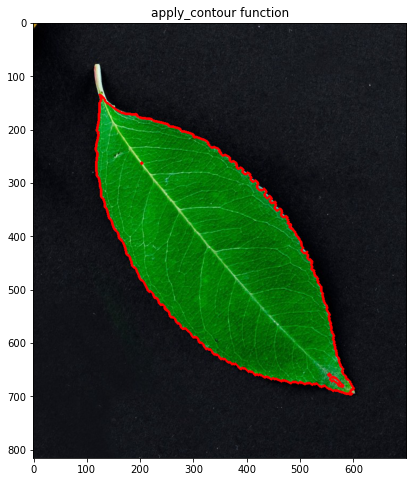

In [33]:
plt.figure(figsize=(8, 8))
new_leaf = apply_contour(green_leaf_img)

plt.title("apply_contour function")
plt.imshow(new_leaf)
plt.show()

### __Exercise 1: Find the contour for yellow ball by its color__

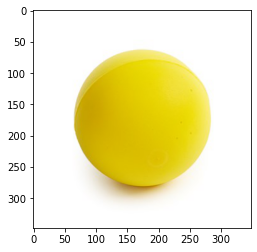

In [34]:
ball_img = mpimg.imread('yellow_foam_ball.jpg')
plt.imshow(ball_img)
plt.show()

This is a 1x1 pixel image with 3 colors of size: (1, 1, 3)
The HSV representation: [[[ 60 255 255]]]


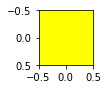

In [35]:
# Hint: what is the ranges of HSV that represent yello?
# Remember in computer vision, an additive coloring process, Yellow = Red + Green
#   See explanation in Lesson2/Blur_Image.ipynb

yellow = np.uint8([[[255, 255, 0]]])
print("This is a 1x1 pixel image with 3 colors of size:", yellow.shape)

yellow_hsv = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print("The HSV representation:", green_hsv)

plt.figure(figsize=(1, 1))
plt.imshow(yellow)
plt.show()

In [36]:
# TODO

# yellow_lower = np.array([x, xx, xxx])
# yellow_upper = np.array([x, xxx, xxx])

# new_ball = apply_contour(ball_img, yellow_lower, yellow_upper)

# plt.title("apply_contour yellow ball")
# plt.imshow(new_ball)
# plt.show()

### __Exercise 2: Find the contour for three yellow balls by its colors__

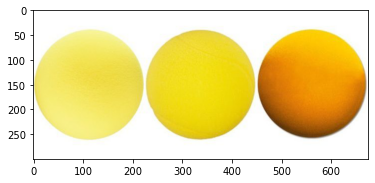

In [37]:
three_balls_img = mpimg.imread('3_yellow_foam_balls.jpg')
plt.imshow(three_balls_img)
plt.show()

In [38]:
# TODO

# yellow_lower = np.array([x, xx, xxx])
# yellow_upper = np.array([x, xx, xxx])

# new_three_balls = apply_contour(three_balls_img, yellow_lower, yellow_upper)

# plt.title("apply_contour yellow balls")
# plt.imshow(new_three_balls)
# plt.show()

### __Exercise 3: Find the contour of 3 by its color__

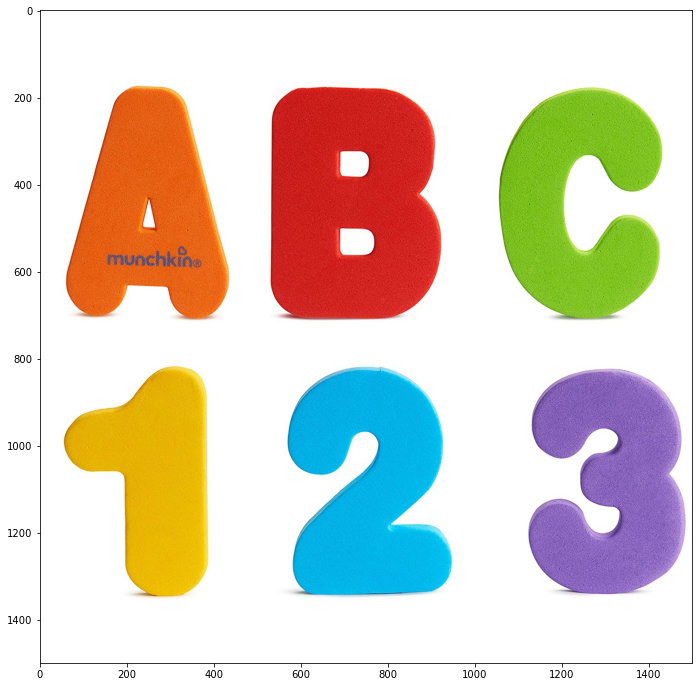

In [39]:
plt.figure(figsize=(12, 12))
abc123_img = mpimg.imread('abc123_blocks.jpg')
plt.imshow(abc123_img)
plt.show()

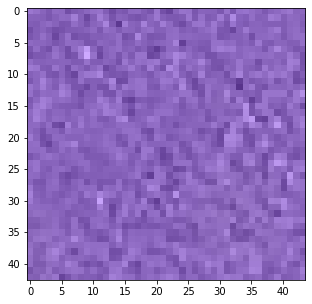

In [40]:
# Hint: Take a look at a smaller portion of the picture 
#       where you will need to know the HSV value range for purple
plt.figure(figsize=(5, 5))

purple_img = mpimg.imread('purple_from_3.jpg')
plt.imshow(purple_img)
plt.show()

In [41]:
# Explore the HSV representation of purple

# TODO

In [42]:
# purple_lower = np.array([x, xx, xxx])
# purple_upper = np.array([x, xx, xxx])

# purple_contour = apply_contour(abc123_img, purple_lower, purple_upper, (0,255,0))

# plt.figure(figsize=(12, 12))
# plt.title("abc123 purple block")
# plt.imshow(purple_contour)
# plt.show()